# OpenClassrooms - parcours Data Analyst Business Intelligence - P8

# Milestone 1 - Analyse des données

Dans cette partie nous allons analyser le jeu de données que nous avons à notre disposition. Notre objectif est de comprendre les relations entre les variables, et surtout, celles qui influent sur le prix des transactions immobilières. Grâce à ce travail, nous pourrons ne conserver que les variables qui seront utiles à l'apprentissage de notre algorithme.

## 1.Type des données

La première étape à réaliser est d'importer les données dans le notebook et d'opérer des transformations sur les variables si celles-ci s'imposent (exemple : nettoyage ou changement de type des variables, etc.).

In [6]:
#On importe les librairies que nous utiliserons pour traiter les données et les visualiser
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
# N'oubliez pas d'avoir installé les librairies pandas, numpy et matplotlib via la commande pip
import openpyxl
print(openpyxl.__version__)


3.1.5


In [7]:
#On importe les données dans un dataframe
df_immo = pd.read_excel(r"C:\Users\aurel\OneDrive\Desktop\Formation BIA\Projet 8 en cours\historique_immobilier_paris_2017_2021_vdef2.xlsx")

Attention, si l'opération ci-dessus ne marche pas, il se peut que le package "openpyxl" ne soit pas présent sur votre ordinateur. Si c'est le cas vous pouvez l'installer en éxécutant la commande : pip install openpyxl ou conda install openpyxl.

In [9]:
#On vérifie que le type des données attribué par pandas est cohérent
df_immo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26196 entries, 0 to 26195
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date_mutation     26196 non-null  datetime64[ns]
 1   valeur_fonciere   26196 non-null  float64       
 2   adresse_numero    26196 non-null  int64         
 3   adresse_nom_voie  26196 non-null  object        
 4   code_postal       26196 non-null  int64         
 5   nom_commune       26196 non-null  object        
 6   code_type_local   26196 non-null  int64         
 7   type_local        26196 non-null  object        
 8   surface_reelle    26196 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 1.8+ MB


In [10]:
df_immo['code_postal'] = df_immo['code_postal'].astype(str)

In [11]:
pd.options.display.float_format = '{:,.2f}'.format

In [12]:
df_immo.describe(include="all")

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle
count,26196,"26,196.00","26,196.00",26196,26196,26196,"26,196.00",26196,"26,196.00"
unique,NaN,NaN,NaN,2874,20,20,NaN,2,NaN
top,NaN,NaN,NaN,RUE DE VAUGIRARD,75018,Paris 18e Arrondissement,NaN,Appartement,NaN
freq,NaN,NaN,NaN,137,2925,2925,NaN,24353,NaN
mean,2019-06-09 14:09:14.099862784,"491,616.99",47.45,NaN,NaN,NaN,2.14,NaN,46.86
min,2017-01-02 00:00:00,"85,194.70",1.00,NaN,NaN,NaN,2.00,NaN,11.00
25%,2018-03-14 00:00:00,"233,943.87",10.00,NaN,NaN,NaN,2.00,NaN,23.00
50%,2019-05-23 00:00:00,"354,577.37",27.00,NaN,NaN,NaN,2.00,NaN,35.00
75%,2020-09-16 00:00:00,"570,219.67",63.00,NaN,NaN,NaN,2.00,NaN,55.00
max,2021-12-31 00:00:00,"38,433,590.20",407.00,NaN,NaN,NaN,4.00,NaN,"3,945.00"


In [13]:
df_immo.head()

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle
0,2017-01-03,"550,559.68",8,RUE DES COUTURES SAINT GERVAIS,75003,Paris 3e Arrondissement,2,Appartement,50
1,2017-01-12,"1,576,492.46",32,AV MARCEAU,75008,Paris 8e Arrondissement,2,Appartement,163
2,2017-01-10,"657,757.36",52,RUE DU FAUBOURG SAINT HONORE,75008,Paris 8e Arrondissement,2,Appartement,66
3,2017-01-10,"250,086.82",64,RUE DU VERTBOIS,75003,Paris 3e Arrondissement,2,Appartement,22
4,2017-01-13,"176,266.71",25,RUE DES LAVANDIERES STE OPPORT,75001,Paris 1er Arrondissement,2,Appartement,15


### 2. Regardons les différents types de biens immobiliers que nous avons dans nos données :

In [15]:
print('la liste des différents types de biens immobiliers que nous avons dans les données est ?:')
types_df_immo = df_immo['type_local'].unique()
types_df_immo

la liste des différents types de biens immobiliers que nous avons dans les données est ?:


array(['Appartement', 'Local industriel. commercial ou assimilé'],
      dtype=object)

On observe qu'il y a ? types de biens, et que leurs codes types sont ?. 

In [17]:
typesl_df_immo = df_immo['code_type_local'].unique()
typesl_df_immo

array([2, 4], dtype=int64)

### 3. Nombre de transactions

In [19]:
#On verifie le nombre de transactions que nous avons dans notre dataframe
print('le nombre de transactions dans les données est ?')
print(len(df_immo))

print('le nombre de transactions pour les appartements dans les données est ?')
transactions_appartements = df_immo[df_immo['type_local'] == 'Appartement']
print(len(transactions_appartements))

print('le nombre de transactions pour les locaux commerciaux dans les données est ?')
transactions_locaux_commerciaux = df_immo[df_immo['type_local'] == 'Local industriel. commercial ou assimilé']
print(len(transactions_locaux_commerciaux))

le nombre de transactions dans les données est ?
26196
le nombre de transactions pour les appartements dans les données est ?
24353
le nombre de transactions pour les locaux commerciaux dans les données est ?
1843


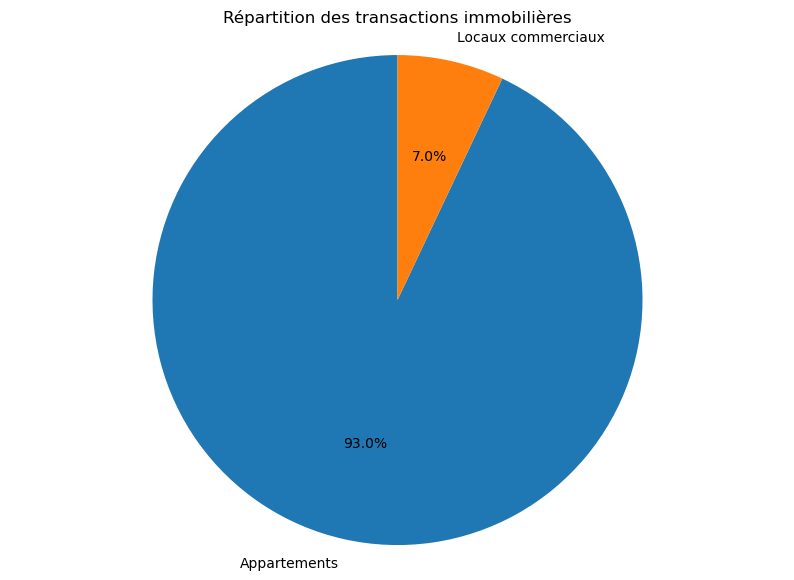

In [20]:
import matplotlib.pyplot as plt

# Préparer les données
labels = ['Appartements', 'Locaux commerciaux']
sizes = [len(transactions_appartements), len(transactions_locaux_commerciaux)]

# Créer le graphique en camembert
plt.figure(figsize=(10, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Répartition des transactions immobilières')
plt.show()

### 4. interval de l'historique des données

In [22]:
#On vérifie également la plage de l'historique disponible
premiere_date = df_immo['date_mutation'].min()
print(f'la première date de transaction dans les données est le : {premiere_date.strftime("%d %B %Y")}')

derniere_date = df_immo['date_mutation'].max()
print(f'la dernière date de transaction dans les données est le : {derniere_date.strftime("%d %B %Y")}')


la première date de transaction dans les données est le : 02 January 2017
la dernière date de transaction dans les données est le : 31 December 2021


## Commençons à analyser les données

Maintenant nous allons analyser les données historiques pour les 2 différents types de biens immobiliers en essayant d'identifier les relations entre les variables. Mais avant cela, il nous faudra pouvoir comparer les biens entre eux, et pour cela nous allons créer une colonne du prix au metre carré.

In [25]:
# Calcul de la colonne
#calcul prix metre carré
df_immo['prix_m2'] = df_immo['valeur_fonciere']/df_immo['surface_reelle']
df_immo.head()

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle,prix_m2
0,2017-01-03,"550,559.68",8,RUE DES COUTURES SAINT GERVAIS,75003,Paris 3e Arrondissement,2,Appartement,50,"11,011.19"
1,2017-01-12,"1,576,492.46",32,AV MARCEAU,75008,Paris 8e Arrondissement,2,Appartement,163,"9,671.73"
2,2017-01-10,"657,757.36",52,RUE DU FAUBOURG SAINT HONORE,75008,Paris 8e Arrondissement,2,Appartement,66,"9,966.02"
3,2017-01-10,"250,086.82",64,RUE DU VERTBOIS,75003,Paris 3e Arrondissement,2,Appartement,22,"11,367.58"
4,2017-01-13,"176,266.71",25,RUE DES LAVANDIERES STE OPPORT,75001,Paris 1er Arrondissement,2,Appartement,15,"11,751.11"


In [26]:
df_immo['prix_m2'].describe()

count   26,196.00
mean    10,325.99
std      1,432.41
min      7,196.49
25%      9,320.80
50%     10,035.67
75%     10,941.13
max     15,547.80
Name: prix_m2, dtype: float64

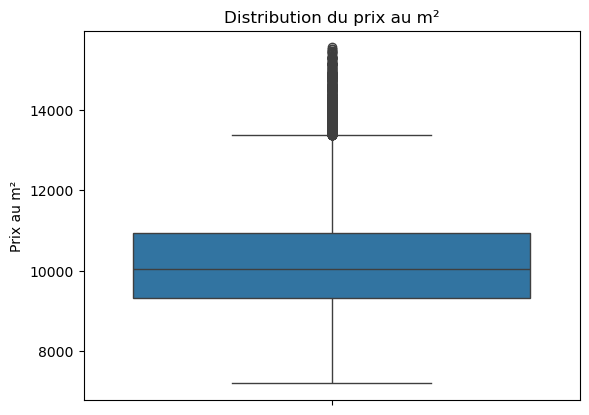

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure()
sns.boxplot(y=df_immo['prix_m2'])
plt.title("Distribution du prix au m²")
plt.ylabel("Prix au m²")
plt.show()

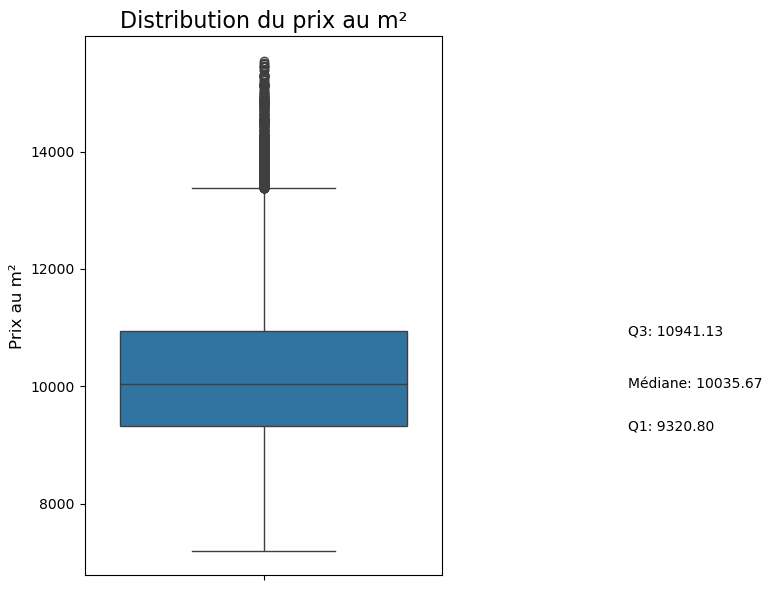

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(y=df_immo['prix_m2'])
plt.title("Distribution du prix au m²", fontsize=16)
plt.ylabel("Prix au m²", fontsize=12)
plt.tick_params(axis='y', labelsize=10)

# Ajout des statistiques sur le graphique
median = df_immo['prix_m2'].median()
q1 = df_immo['prix_m2'].quantile(0.25)
q3 = df_immo['prix_m2'].quantile(0.75)

plt.text(1.02, median, f'Médiane: {median:.2f}', verticalalignment='center')
plt.text(1.02, q1, f'Q1: {q1:.2f}', verticalalignment='center')
plt.text(1.02, q3, f'Q3: {q3:.2f}', verticalalignment='center')

plt.tight_layout()
plt.show()

Maintenant, analysons les appartements.

### 5. Evolution du prix au metre carré des appartements dans Paris

In [31]:
#On retire les colonnes qui sont à priori inutiles ET nous allons nous concentrer sur les appartements dans un premier temps
df_immo = df_immo.drop(columns=['adresse_numero', 'adresse_nom_voie'])
df_immo.describe()

,date_mutation,valeur_fonciere,code_type_local,surface_reelle,prix_m2
count,26196,"26,196.00","26,196.00","26,196.00","26,196.00"
mean,2019-06-09 14:09:14.099862784,"491,616.99",2.14,46.86,"10,325.99"
min,2017-01-02 00:00:00,"85,194.70",2.00,11.00,"7,196.49"
25%,2018-03-14 00:00:00,"233,943.87",2.00,23.00,"9,320.80"
50%,2019-05-23 00:00:00,"354,577.37",2.00,35.00,"10,035.67"
75%,2020-09-16 00:00:00,"570,219.67",2.00,55.00,"10,941.13"
max,2021-12-31 00:00:00,"38,433,590.20",4.00,"3,945.00","15,547.80"
std,NaN,"571,329.24",0.51,52.41,"1,432.41"


In [32]:
#Préparons un dataframe en regroupant les prix moyens de ventes des appartements par année avec la surface moyenne associée

# Filtrer pour les appartements
df_appart = df_immo[df_immo['type_local'] == 'Appartement']

# Grouper par année et calculer la moyenne du prix au m² et de la surface
df_appart_annuel = df_appart.groupby(df_appart['date_mutation'].dt.year).agg({
    'prix_m2': 'mean',
    'surface_reelle': 'mean'
}).reset_index()

# Renommer les colonnes
df_appart_annuel.columns = ['annee', 'Prix moyen au m²', 'Surface moyenne']

# Afficher les résultats
df_appart_annuel

,annee,Prix moyen au m²,Surface moyenne
0,2017,"9,492.86",44.63
1,2018,"10,031.40",44.27
2,2019,"10,562.71",43.36
3,2020,"10,674.87",42.90
4,2021,"10,455.60",43.48


In [33]:
print(df_appart_annuel.columns)

Index(['annee', 'Prix moyen au m²', 'Surface moyenne'], dtype='object')


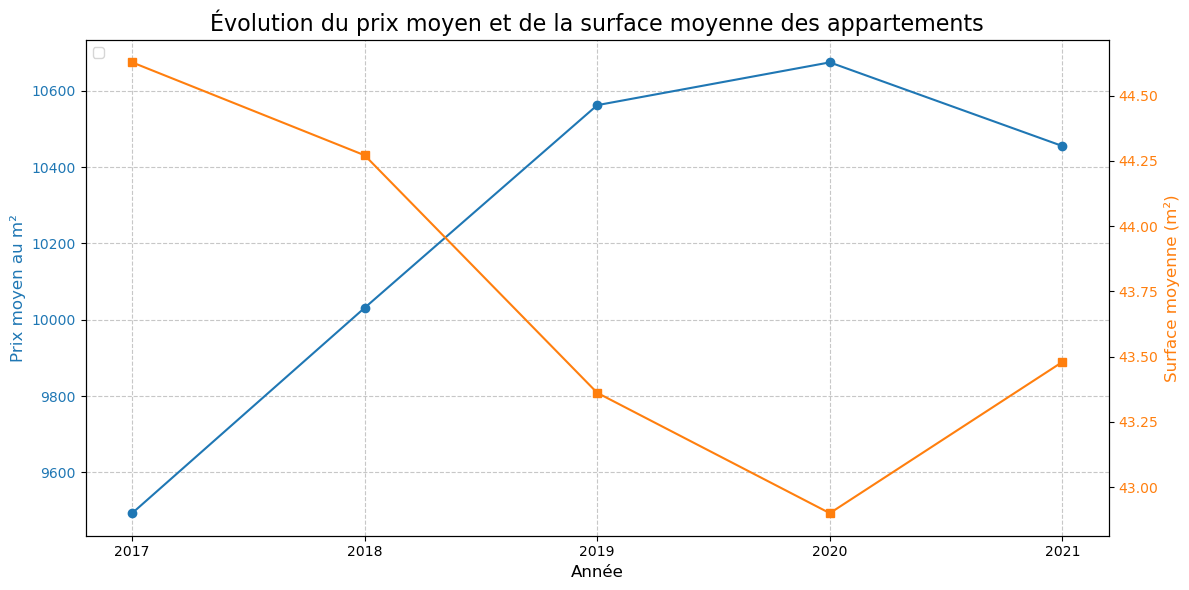

In [34]:
import matplotlib.pyplot as plt

# Assurez-vous que les années sont des entiers
df_appart_annuel['annee'] = df_appart_annuel['annee'].astype(int)

# Créer la figure et les axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Tracer la ligne pour le prix moyen
color = 'tab:blue'
ax1.set_xlabel('Année', fontsize=12)
ax1.set_ylabel('Prix moyen au m²', color=color, fontsize=12)
ax1.plot(df_appart_annuel['annee'], df_appart_annuel['Prix moyen au m²'], color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

# Créer un deuxième axe y pour la surface moyenne
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Surface moyenne (m²)', color=color, fontsize=12)
ax2.plot(df_appart_annuel['annee'], df_appart_annuel['Surface moyenne'], color=color, marker='s')
ax2.tick_params(axis='y', labelcolor=color)

# Configurer l'axe x pour afficher des années entières
plt.xticks(df_appart_annuel['annee'])
ax1.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Ajouter un titre
plt.title('Évolution du prix moyen et de la surface moyenne des appartements', fontsize=16)

# Ajouter une légende
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, ['Prix moyen', 'Surface moyenne'], loc='upper left')

# Ajouter une grille pour une meilleure lisibilité
ax1.grid(True, linestyle='--', alpha=0.7)

# Ajuster la mise en page
plt.tight_layout()

# Afficher le graphique
plt.show()

On constate sur la moyenne des prix de vente des appartements à Paris que ? <br> **les prix baissent depuis 2020 (covid?)**<br>
Nous allons créer un graphique pour mieux le visualiser.

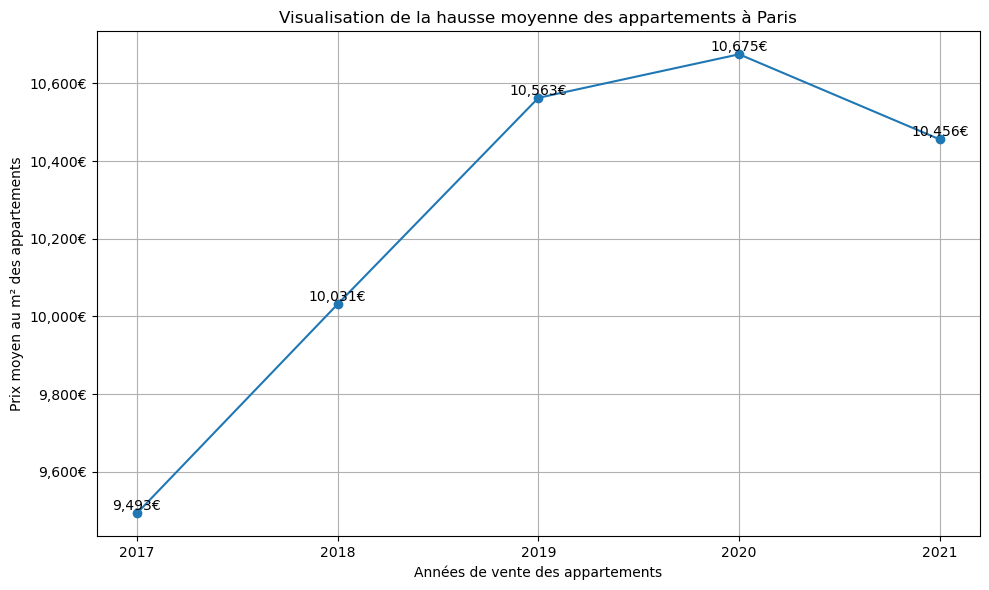

In [36]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

annees = df_appart_annuel['annee']
prix_moyen = df_appart_annuel['Prix moyen au m²']
interval_historique=['2017','2018','2019','2020','2021']
interval_historique = [int(year) for year in interval_historique]

plt.figure(figsize=(10,6))
plt.plot(annees, prix_moyen, marker='o')

plt.xlabel('Années de vente des appartements')
plt.ylabel('Prix moyen au m² des appartements')
formatter = ticker.FuncFormatter(lambda x, p: f'{x:,.0f}€')
plt.gca().yaxis.set_major_formatter(formatter)

plt.xticks(interval_historique)

# Formater les étiquettes de l'axe x pour supprimer la décimale
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x:.0f}'))
plt.grid(True)
plt.title('Visualisation de la hausse moyenne des appartements à Paris')

# Ajout des valeurs sur les points
for i, v in enumerate(prix_moyen):
    plt.text(annees[i], v, f'{v:,.0f}€', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### 6. Différences de prix au metre carré entre les arrondissements

Maintenant nous allons chercher à afficher l'évolution des prix par arrondissement. Vérifions la liste des arrondissements que nous avons dans nos données. Normalement à Paris nous avons 20 codes postaux différents, 1 par arrondissement allant de 75001 à 75020.

In [39]:
#Liste des codes postaux dans nos données.
code_post_df_immo = df_immo['code_postal'].unique()
code_post_df_immo

array(['75003', '75008', '75001', '75006', '75005', '75007', '75010',
       '75009', '75011', '75012', '75013', '75014', '75015', '75016',
       '75017', '75018', '75020', '75019', '75004', '75002'], dtype=object)

In [40]:
# Filtrer d'abord pour ne garder que les appartements
df_immo_appartements = df_immo.query("code_type_local == 2")

# Créons un dataframe pour une visualisation avec l'évolution des prix par arrondissement, toutes années confondues
df_prix_par_arrondissement = df_immo_appartements.groupby('code_postal').agg({
    'valeur_fonciere': 'mean',
    'surface_reelle': 'mean',
    'prix_m2': 'mean'  
}).reset_index()

# Renommons les colonnes
df_prix_par_arrondissement.columns = ['code_postal', 'prix_moyen', 'surface_moyenne', 'prix_m2_moyen']

# Trions par code postal
df_prix_par_arrondissement = df_prix_par_arrondissement.sort_values('code_postal')

# Affichage des 20 premières lignes
print(df_prix_par_arrondissement.head(20))

   code_postal  prix_moyen  surface_moyenne  prix_m2_moyen
0        75001  554,648.25            43.32      12,833.90
1        75002  460,325.14            39.46      11,667.52
2        75003  514,599.52            41.20      12,465.63
3        75004  572,361.83            43.57      13,123.57
4        75005  459,687.78            37.48      12,295.09
5        75006  670,694.78            51.00      13,143.51
6        75007  717,567.85            56.89      12,649.30
7        75008  730,700.16            66.87      10,948.82
8        75009  483,288.01            46.19      10,476.60
9        75010  388,866.27            40.33       9,655.44
10       75011  364,381.18            36.52       9,979.58
11       75012  369,521.52            40.14       9,206.67
12       75013  330,892.87            36.81       8,976.32
13       75014  392,738.99            40.58       9,691.58
14       75015  397,676.14            41.29       9,636.22
15       75016  716,756.55            68.39      10,487.

In [41]:
#Créeons un dataframe pour une deuxième visualisation avec l'evolution des prix par arrondissement
df_prix_par_arrond_appart = df_appart.groupby([df_appart['date_mutation'].dt.year, 'code_postal']).agg({
    'valeur_fonciere': 'mean',
    'surface_reelle': 'mean'
}).reset_index()

df_prix_par_arrond_appart .columns = ['annee','code_postal', 'prix_moyen', 'surface_moyenne']
df_prix_par_arrond_appart.head(20)

,annee,code_postal,prix_moyen,surface_moyenne
0,2017,75001,"530,392.41",45.24
1,2017,75002,"470,308.38",43.09
2,2017,75003,"445,875.08",38.15
3,2017,75004,"507,122.25",40.94
4,2017,75005,"440,921.99",39.05
5,2017,75006,"582,541.65",46.62
6,2017,75007,"745,605.08",62.85
7,2017,75008,"707,016.40",69.75
8,2017,75009,"457,244.89",47.72
9,2017,75010,"357,132.74",40.81


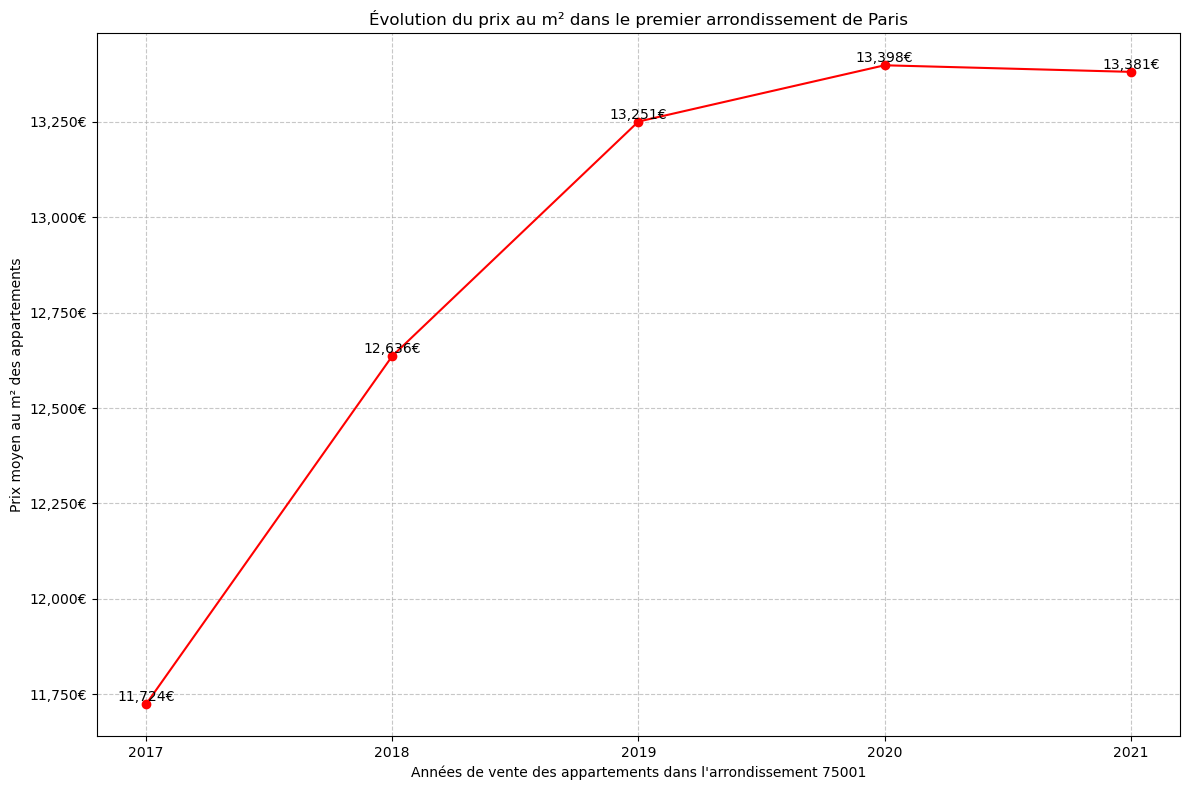

In [42]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix au metre carré dans le premier arrondissement - appartement

# Filtrer les données pour le premier arrondissement (code postal 75001)
df_premier_arr = df_prix_par_arrond_appart[df_prix_par_arrond_appart['code_postal'] == '75001']

interval_historique=['2017','2018','2019','2020','2021']
interval_historique = [int(year) for year in interval_historique]

# Trier les données par année pour s'assurer qu'elles sont dans le bon ordre
df_premier_arr = df_premier_arr.sort_values('annee')

# Calculer le prix au m²
df_premier_arr['prix_m2'] = df_premier_arr['prix_moyen'] / df_premier_arr['surface_moyenne']

plt.figure(figsize=(12, 8))
plt.plot(df_premier_arr['annee'], df_premier_arr['prix_m2'], color='red', marker='o')

plt.xlabel('Années de vente des appartements dans l\'arrondissement 75001')
plt.ylabel('Prix moyen au m² des appartements')
formatter = ticker.FuncFormatter(lambda x, p: f'{x:,.0f}€')
plt.gca().yaxis.set_major_formatter(formatter)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x:.0f}'))
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Évolution du prix au m² dans le premier arrondissement de Paris')
plt.xticks(interval_historique)
# Ajout des valeurs sur les points
for i, row in df_premier_arr.iterrows():
    plt.text(row['annee'], row['prix_m2'], f'{row["prix_m2"]:,.0f}€', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [43]:
df_premier_arr

,annee,code_postal,prix_moyen,surface_moyenne,prix_m2
0,2017,75001,"530,392.41",45.24,"11,723.61"
20,2018,75001,"581,390.37",46.01,"12,636.12"
40,2019,75001,"454,606.24",34.31,"13,250.85"
60,2020,75001,"601,204.89",44.87,"13,398.39"
80,2021,75001,"639,321.08",47.78,"13,381.14"


In [44]:
# Filtrer les transactions pour le code postal 75001
df_75001_transactions = df_immo[df_immo['code_postal'] == '75001']
df_75001_transactions = df_75001_transactions[df_75001_transactions['code_type_local'] == 2]
# Trier par date de mutation
df_75001_transactions = df_75001_transactions.sort_values('date_mutation')

# Calculer le prix au m² pour chaque transaction 
if 'prix_m2' not in df_75001_transactions.columns:
    df_75001_transactions['prix_m2'] = df_75001_transactions['valeur_fonciere'] / df_75001_transactions['surface_reelle']

# Sélectionner et afficher les colonnes pertinentes
colonnes_a_afficher = ['date_mutation', 'valeur_fonciere', 'surface_reelle', 'prix_m2', 'code_type_local']
print(df_75001_transactions[colonnes_a_afficher].head(20))

# Afficher le nombre total de transactions
print(f"\nNombre total de transactions dans le 75001 : {len(df_75001_transactions)}")


    date_mutation  valeur_fonciere  surface_reelle   prix_m2  code_type_local
4      2017-01-13       176,266.71              15 11,751.11                2
22     2017-01-16       806,650.04              70 11,523.57                2
24     2017-01-19       465,737.38              40 11,643.43                2
26     2017-01-23       830,370.41              72 11,532.92                2
13     2017-01-27       376,646.09              32 11,770.19                2
19     2017-02-03     1,270,237.72             110 11,547.62                2
50     2017-02-10       702,129.23              62 11,324.67                2
57     2017-02-10       800,857.08              70 11,440.82                2
47     2017-02-23       295,174.51              25 11,806.98                2
68     2017-02-23       527,068.26              46 11,458.01                2
42     2017-02-25       137,527.80              12 11,460.65                2
66     2017-03-01       573,296.99              50 11,465.94    

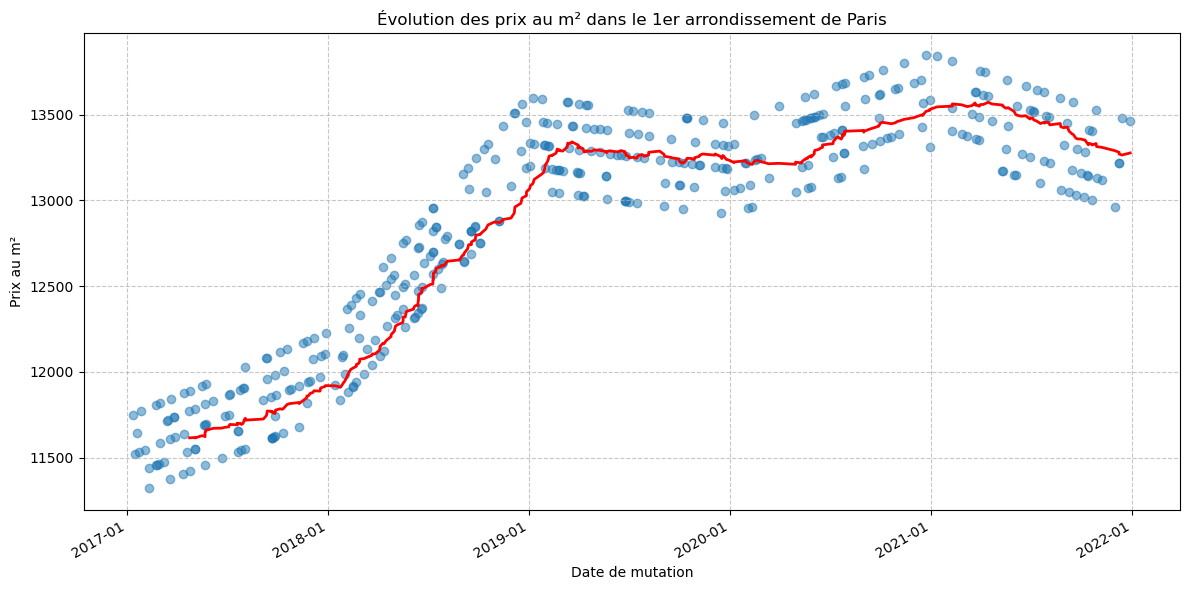

In [45]:
#7.	les prix au mètre carré par transaction dans un arrondissement - appartement
import matplotlib.dates as mdates
# Convertir date_mutation en datetime si ce n'est pas déjà fait
df_75001_transactions['date_mutation'] = pd.to_datetime(df_75001_transactions['date_mutation'])

# Créer le graphique
plt.figure(figsize=(12, 6))
plt.scatter(df_75001_transactions['date_mutation'], df_75001_transactions['prix_m2'], alpha=0.5)
plt.plot(df_75001_transactions['date_mutation'], df_75001_transactions['prix_m2'].rolling(window=30).mean(), color='red', linewidth=2)

# Configurer les axes
plt.xlabel('Date de mutation')
plt.ylabel('Prix au m²')
plt.title('Évolution des prix au m² dans le 1er arrondissement de Paris')

# Formater l'axe des dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gcf().autofmt_xdate()  # Rotation des labels de date

# Ajouter une grille
plt.grid(True, linestyle='--', alpha=0.7)

# Afficher le graphique
plt.tight_layout()
plt.show()

Nous allons ajouter à cette visualisation tous les autres arrondissement avec une couleur différente.

In [47]:
print(df_prix_par_arrondissement.columns)

Index(['code_postal', 'prix_moyen', 'surface_moyenne', 'prix_m2_moyen'], dtype='object')


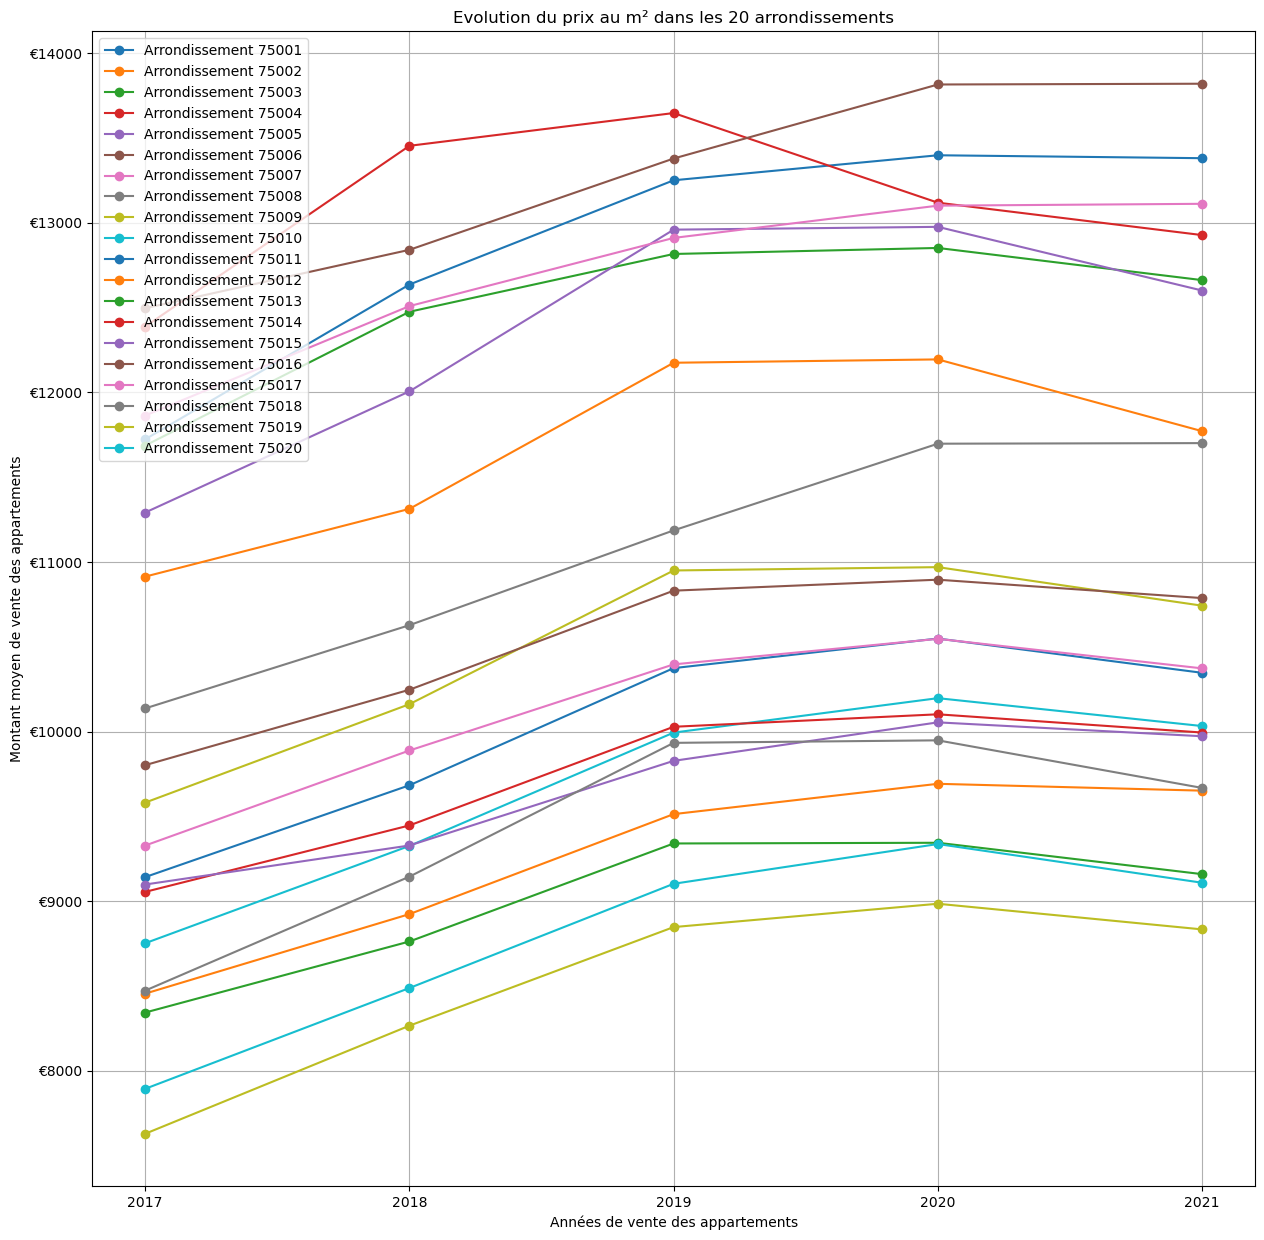

In [48]:
# Extraire l'année de la colonne date_mutation
df_immo['annee'] = pd.to_datetime(df_immo['date_mutation']).dt.year

# Filtrer uniquement les appartements (code_type_local == 2)
df_appart = df_immo[df_immo['code_type_local'] == 2]

# Regrouper par année et code postal, calculer les moyennes
df_prix_par_arrondissement = df_appart.groupby(['annee', 'code_postal']).agg({
    'valeur_fonciere': 'mean',
    'surface_reelle': 'mean'
}).reset_index()

# Renommer les colonnes pour plus de clarté
df_prix_par_arrondissement.columns = ['annee', 'code_postal', 'prix_moyen', 'surface_moyenne']

# Tracer le graphique
plt.figure(figsize=(15, 15))
interval_historique = ['2017', '2018', '2019', '2020', '2021']
interval_historique = [int(year) for year in interval_historique]

for arrondissement in df_prix_par_arrondissement['code_postal'].unique():
    df_arr = df_prix_par_arrondissement[df_prix_par_arrondissement['code_postal'] == arrondissement]
    df_arr = df_arr.sort_values('annee')
    df_arr['prix_m2'] = df_arr['prix_moyen'] / df_arr['surface_moyenne']
    plt.plot(df_arr['annee'], df_arr['prix_m2'], marker='o', label=f'Arrondissement {arrondissement}')

plt.xticks(interval_historique)
plt.xlabel('Années de vente des appartements')
plt.ylabel('Montant moyen de vente des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution du prix au m² dans les 20 arrondissements')
plt.legend(loc='upper left')
plt.show()

On observe que globalement que  : **augmentation jusuq'en 2019-2020, chute en 2020**

### 7. Prix au metre carré par transaction dans un arrondissement

In [51]:
#Vérifions le nombre de transaction dans le 6ème car le prix semble élevé
df_immo[df_immo['code_postal'] == '75006'].value_counts()

date_mutation  valeur_fonciere  code_postal  nom_commune              code_type_local  type_local                                surface_reelle  prix_m2    annee
2017-01-05     307,594.71       75006        Paris 6e Arrondissement  2                Appartement                               25              12,303.79  2017     1
2019-12-30     350,382.87       75006        Paris 6e Arrondissement  2                Appartement                               25              14,015.31  2019     1
2019-10-23     1,147,506.78     75006        Paris 6e Arrondissement  2                Appartement                               86              13,343.10  2019     1
2019-10-25     1,757,032.25     75006        Paris 6e Arrondissement  2                Appartement                               129             13,620.41  2019     1
2019-10-26     397,426.10       75006        Paris 6e Arrondissement  4                Local industriel. commercial ou assimilé  26              15,285.62  2019     1
   

In [52]:
df_immo.describe(include='all')

,date_mutation,valeur_fonciere,code_postal,nom_commune,code_type_local,type_local,surface_reelle,prix_m2,annee
count,26196,"26,196.00",26196,26196,"26,196.00",26196,"26,196.00","26,196.00","26,196.00"
unique,NaN,NaN,20,20,NaN,2,NaN,NaN,NaN
top,NaN,NaN,75018,Paris 18e Arrondissement,NaN,Appartement,NaN,NaN,NaN
freq,NaN,NaN,2925,2925,NaN,24353,NaN,NaN,NaN
mean,2019-06-09 14:09:14.099862784,"491,616.99",NaN,NaN,2.14,NaN,46.86,"10,325.99","2,018.93"
min,2017-01-02 00:00:00,"85,194.70",NaN,NaN,2.00,NaN,11.00,"7,196.49","2,017.00"
25%,2018-03-14 00:00:00,"233,943.87",NaN,NaN,2.00,NaN,23.00,"9,320.80","2,018.00"
50%,2019-05-23 00:00:00,"354,577.37",NaN,NaN,2.00,NaN,35.00,"10,035.67","2,019.00"
75%,2020-09-16 00:00:00,"570,219.67",NaN,NaN,2.00,NaN,55.00,"10,941.13","2,020.00"
max,2021-12-31 00:00:00,"38,433,590.20",NaN,NaN,4.00,NaN,"3,945.00","15,547.80","2,021.00"


In [53]:
# Créer la nouvelle colonne 'arrondissement' en tant qu'entier
df_immo['arrondissement'] = df_immo['code_postal'].astype(str).str[-2:].astype(int)

# Appliquer la condition pour Paris (codes postaux commençant par 75)
df_immo.loc[df_immo['code_postal'].astype(str).str.startswith('75'), 'arrondissement'] = df_immo['code_postal'].astype(str).str[-2:].astype(int)

# Pour les autres codes postaux, mettre -1 ou 0 selon votre préférence
df_immo.loc[~df_immo['code_postal'].astype(str).str.startswith('75'), 'arrondissement'] = -1  # ou 0 si vous préférez
df_immo

,date_mutation,valeur_fonciere,code_postal,nom_commune,code_type_local,type_local,surface_reelle,prix_m2,annee,arrondissement
0,2017-01-03,"550,559.68",75003,Paris 3e Arrondissement,2,Appartement,50,"11,011.19",2017,3
1,2017-01-12,"1,576,492.46",75008,Paris 8e Arrondissement,2,Appartement,163,"9,671.73",2017,8
2,2017-01-10,"657,757.36",75008,Paris 8e Arrondissement,2,Appartement,66,"9,966.02",2017,8
3,2017-01-10,"250,086.82",75003,Paris 3e Arrondissement,2,Appartement,22,"11,367.58",2017,3
4,2017-01-13,"176,266.71",75001,Paris 1er Arrondissement,2,Appartement,15,"11,751.11",2017,1
...,...,...,...,...,...,...,...,...,...,...
26191,2021-02-25,"471,223.93",75004,Paris 4e Arrondissement,2,Appartement,37,"12,735.78",2021,4
26192,2021-02-17,"1,982,330.46",75002,Paris 2e Arrondissement,4,Local industriel. commercial ou assimilé,150,"13,215.54",2021,2
26193,2021-03-08,"312,435.91",75002,Paris 2e Arrondissement,2,Appartement,26,"12,016.77",2021,2
26194,2021-03-11,"156,223.38",75002,Paris 2e Arrondissement,2,Appartement,13,"12,017.18",2021,2


In [54]:
(df_immo['code_postal'] == '75006').sum()

782

In [55]:
(df_immo['arrondissement'] == 6).sum()

782

In [56]:
df_immo_6 = df_immo[df_immo['arrondissement'] == 6].drop_duplicates().shape[0]
df_immo_6

782

In [57]:
df_immo_75006 = df_immo[df_immo['code_postal'] == '75006'].drop_duplicates().shape[0]
df_immo_75006

782

In [58]:
df_immo_750066 = np.shape (df_immo[df_immo['code_postal'] == '75006'])
df_immo_750066

(782, 10)

In [59]:
doublons = df_immo[df_immo['code_postal'] == '75006'].duplicated().sum()
print(f"Nombre de doublons pour le code postal '75006': {doublons}")

Nombre de doublons pour le code postal '75006': 0


In [60]:
colonnes_uniques = ['date_mutation', 'valeur_fonciere', 'code_postal', 'code_type_local', 'surface_reelle', 'prix_m2','nom_commune']  
df_immo_75006 = df_immo[df_immo['code_postal'] == '75006'].drop_duplicates(subset=colonnes_uniques)
nombre_transactions_uniques = df_immo_75006.shape[0]
nombre_transactions_uniques

782

On constate que ?

Affichons l'historique des transactions pour visualiser la dispersion des données :

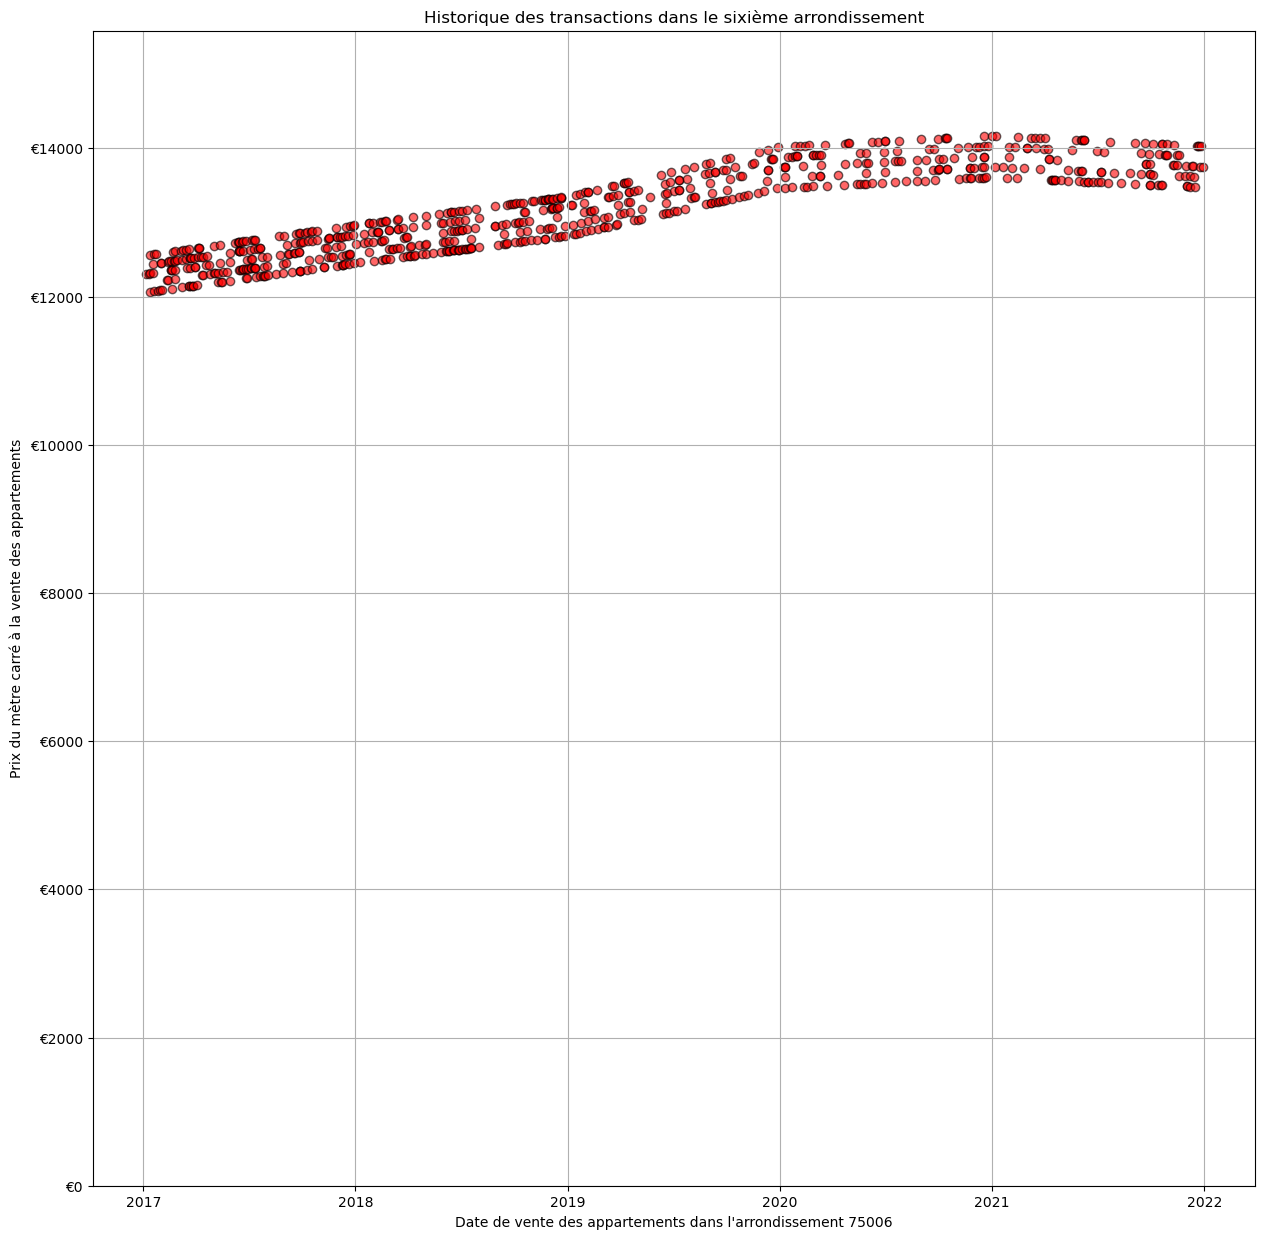

In [62]:
cp = '75006'

# Filtrer les données pour le 6ème arrondissement
df_75006 = df_immo[(df_immo['code_postal'] == cp) & (df_immo['code_type_local'] == 2)].copy()

# Trier par date
df_75006 = df_75006.sort_values('date_mutation')

plt.figure(figsize=(15,15))
plt.scatter(df_75006['date_mutation'], df_75006['prix_m2'], 
            alpha=0.6, 
            c='red',
            edgecolors='black')

plt.xlabel('Date de vente des appartements dans l\'arrondissement 75006')
plt.ylabel('Prix du mètre carré à la vente des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.ylim(0, df_75006['prix_m2'].max() * 1.1)  # Ajustement de l'échelle y
plt.grid(which='both')
plt.title('Historique des transactions dans le sixième arrondissement')
plt.show()   

On observe que : **on a une droite.** **la plupart des tansactions se situes entre 1200 et 1400 la courbe suit la logique**

Pour nous rassurer sur la relation entre les données nous allons utiliser un test statistique de corrélation.

### 8. Vérification de la relation entre le prix au m² et la date dans le 6ème arrondissement par le calcul du coefficient de corrélation de Pearson 

Pour cette distribution nous allons calculer le coefficient de corrélation de Pearson. La relation entre le prix au metre carré et la date n'est pas forcément linéaire mais elle s'en rapproche suffisamment pour que cette analyse soit pertinente (voir l'évolution du prix au metre carré globale montrée plus haut, on a presque une droite sauf entre 2020 et 2021). Ce qui nous interesse c'est de prouver que le temps a une influence sur le prix.

In [66]:
#On calcule la corrélation de Spearman
from scipy import stats

# Convertir les dates en format numérique (timestamp Unix)
df_75006['date_num'] = df_75006['date_mutation'].astype('int64') // 10**9

# Calculer le coefficient de Pearson
pearson_corr, p_value = stats.pearsonr(
    x=df_75006['date_num'], 
    y=df_75006['prix_m2']
)

# Formater les résultats
print(f"""
Coefficient de Pearson (r) : {pearson_corr:.3f}
Valeur-p : {p_value:.3e}
""")



Coefficient de Pearson (r) : 0.904
Valeur-p : 7.108e-263



<Axes: xlabel='date_num', ylabel='prix_m2'>

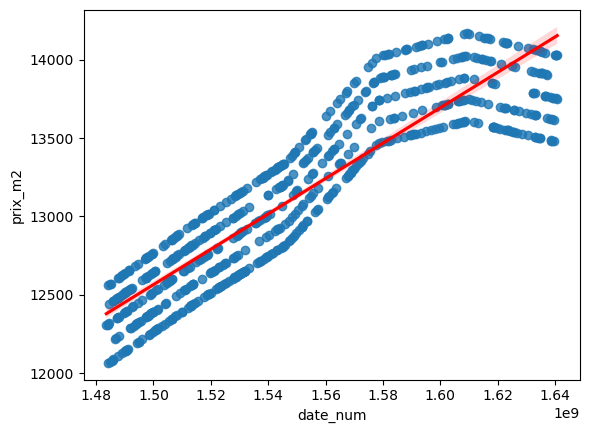

In [67]:
from scipy.stats import pearsonr
import seaborn as sns

sns.regplot(x='date_num', y='prix_m2', data=df_75006, robust=True, line_kws=dict(color="r"))

Le coefficient de corrélation est de **0.904** : relation linéaire très forte,  avec une pvalue de **7.108e-263** inférieur à 0.05 . Donc nous pouvons confirmer la corrélation.

In [69]:

# Calculer le coefficient de corrélation de Pearson et la valeur p pour arrondissment 6
correlation, p_value = pearsonr(df_75006['date_num'], df_75006['prix_m2'])  

print(f"Coefficient : {correlation:.3f}")
print(f"p-value : {p_value:.3e}")

Coefficient : 0.904
p-value : 7.108e-263


### 9. Vérification de la relation entre la valeur fonciere et la surface

In [71]:
# Calcul des corrélations tout arronissement
pearson_corr, p_pearson = stats.pearsonr(df_immo['valeur_fonciere'], df_immo['surface_reelle'])
spearman_corr, p_spearman = stats.spearmanr(df_immo['valeur_fonciere'], df_immo['surface_reelle'])

print(f"""
Pearson (relation linéaire): 
- Coefficient = {pearson_corr:.3f} 
- p-value = {p_pearson:.3e}

Spearman (relation monotone): 
- Coefficient = {spearman_corr:.3f}
- p-value = {p_spearman:.3e}
""")


Pearson (relation linéaire): 
- Coefficient = 0.984 
- p-value = 0.000e+00

Spearman (relation monotone): 
- Coefficient = 0.977
- p-value = 0.000e+00



In [72]:
df_immo['valeur_fonciere'] = pd.to_numeric(df_immo['valeur_fonciere'], errors='coerce')
df_immo['surface_reelle'] = pd.to_numeric(df_immo['surface_reelle'], errors='coerce')

<Axes: xlabel='surface_reelle', ylabel='valeur_fonciere'>

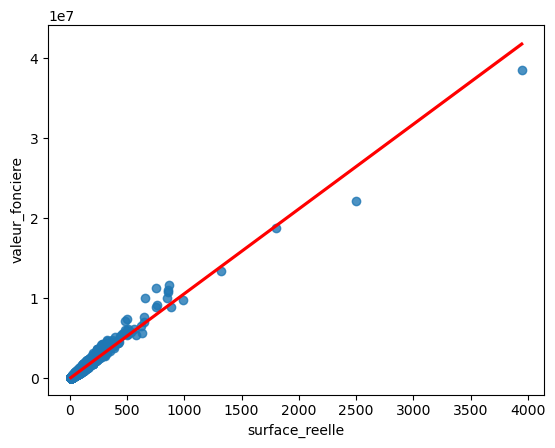

In [73]:
sns.regplot(x='surface_reelle', y='valeur_fonciere', data=df_immo, robust=True, line_kws=dict(color="r"))

Le coefficient de corrélation est de **0.984** avec une pvalue de **0.000e+00**. La relation est donc confirmée. 
Cette relation est à la fois linéaire (Pearson) et monotone (Spearman), ce qui suggère qu'elle est robuste et constante sur l'ensemble des données. 

La surface explique une grande partie de la variation de la valeur foncière.


Regardons maintenant si le type de bien à une influence sur le prix au metre carré également.

### 10. Analyse des locaux industriels, commerciaux et assimilés 

In [77]:
#On crée un dataset qui ne contient que les locaux commerciaux
df_locaux_comm = df_immo[df_immo['code_type_local'] == 4]

Text(0.5, 1.0, 'Evolution des prix au mètre carré')

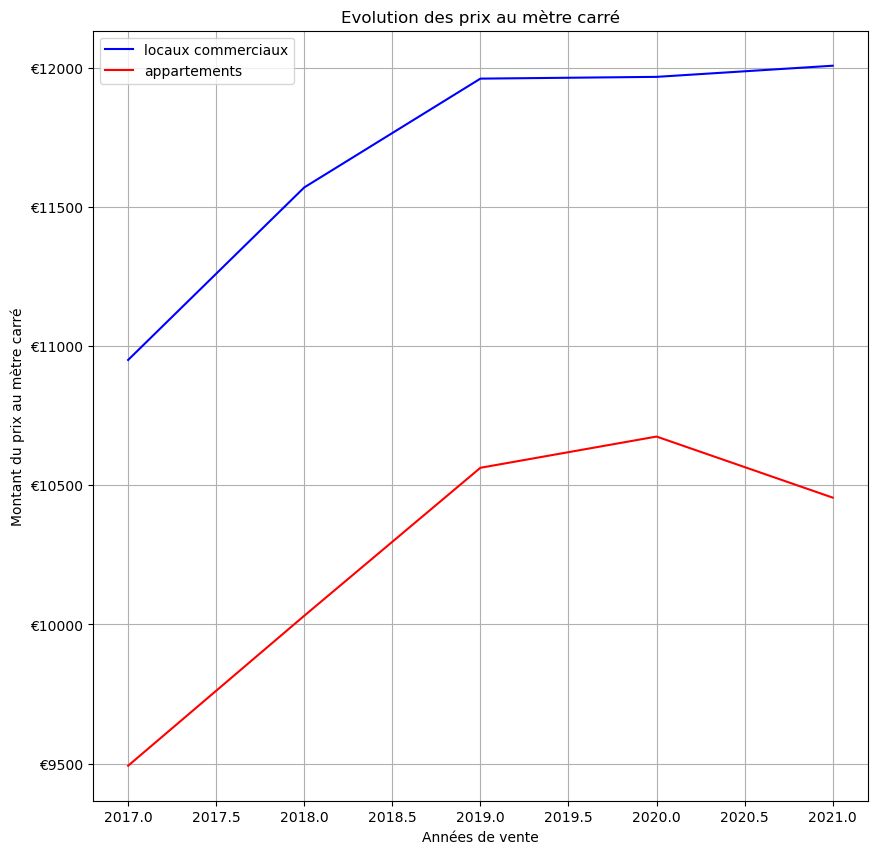

In [78]:
# Grouper par année et type de local, puis calculer la moyenne des prix au m²
df_prix_moyen_annuel = df_immo.groupby(['annee', 'code_type_local'])['prix_m2'].mean().reset_index()


# Renommer les colonnes pour plus de clarté
df_prix_moyen_annuel.columns = ['annee', 'Type de local', 'Prix moyen au m²']

plt.figure(figsize=(10,10))


# Filtrer les données pour les locaux commerciaux et les appartements
df_locaux_commerc = df_prix_moyen_annuel[df_prix_moyen_annuel['Type de local'] == 4]
df_appartements = df_prix_moyen_annuel[df_prix_moyen_annuel['Type de local'] == 2] 

# Tracer les lignes pour les locaux commerciaux et les appartements
plt.plot(df_locaux_commerc['annee'], df_locaux_commerc['Prix moyen au m²'], label='locaux commerciaux', color='blue')
plt.plot(df_appartements['annee'], df_appartements['Prix moyen au m²'], label='appartements', color='red')


plt.xlabel('Années de vente')
plt.ylabel('Montant du prix au mètre carré')
plt.legend()
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution des prix au mètre carré')


In [79]:
df_prix_moyen_annuel

,annee,Type de local,Prix moyen au m²
0,2017,2,"9,492.86"
1,2017,4,"10,949.91"
2,2018,2,"10,031.40"
3,2018,4,"11,569.50"
4,2019,2,"10,562.71"
5,2019,4,"11,960.13"
6,2020,2,"10,674.87"
7,2020,4,"11,966.47"
8,2021,2,"10,455.60"
9,2021,4,"12,006.49"


Le prix au metre carré des locaux commerciaux est ?

In [81]:
df_locaux_commerc

,annee,Type de local,Prix moyen au m²
1,2017,4,"10,949.91"
3,2018,4,"11,569.50"
5,2019,4,"11,960.13"
7,2020,4,"11,966.47"
9,2021,4,"12,006.49"


In [82]:
df_appartements 

,annee,Type de local,Prix moyen au m²
0,2017,2,"9,492.86"
2,2018,2,"10,031.40"
4,2019,2,"10,562.71"
6,2020,2,"10,674.87"
8,2021,2,"10,455.60"


In [83]:
prix_moyen_locaux_comm = round(df_locaux_commerc['Prix moyen au m²'].mean(),2)
prix_moyen_locaux_comm

11690.5

In [84]:
prix_moyen_appart = round(df_appartements['Prix moyen au m²'].mean(),2)
prix_moyen_appart

10243.49

Après ces analyses, nous pouvons conclure que les dimensions à utiliser pour prédire le prix au m² sont : 
- la surface du bien immobilier,
- la date considérée, 
- la localisation (code_postal), 
- le type de bien.

# Milestone 2 - Entraînement de l'algorithme

In [87]:
df_immo.head()

,date_mutation,valeur_fonciere,code_postal,nom_commune,code_type_local,type_local,surface_reelle,prix_m2,annee,arrondissement
0,2017-01-03,"550,559.68",75003,Paris 3e Arrondissement,2,Appartement,50,"11,011.19",2017,3
1,2017-01-12,"1,576,492.46",75008,Paris 8e Arrondissement,2,Appartement,163,"9,671.73",2017,8
2,2017-01-10,"657,757.36",75008,Paris 8e Arrondissement,2,Appartement,66,"9,966.02",2017,8
3,2017-01-10,"250,086.82",75003,Paris 3e Arrondissement,2,Appartement,22,"11,367.58",2017,3
4,2017-01-13,"176,266.71",75001,Paris 1er Arrondissement,2,Appartement,15,"11,751.11",2017,1


In [88]:
df_prix_par_arrondissement

,annee,code_postal,prix_moyen,surface_moyenne
0,2017,75001,"530,392.41",45.24
1,2017,75002,"470,308.38",43.09
2,2017,75003,"445,875.08",38.15
3,2017,75004,"507,122.25",40.94
4,2017,75005,"440,921.99",39.05
...,...,...,...,...
95,2021,75016,"732,964.14",67.95
96,2021,75017,"485,246.57",46.78
97,2021,75018,"364,055.85",37.66
98,2021,75019,"337,972.96",38.26


Dans cette section nous allons maintenant entrainer un algorithme à prédire la valeur fonciere d'un bien immobilier. Pour cela nous allons utiliser l'algorithme de régression linéaire.

On commence par préparer nos données en transformant les colonnes catégoriques du code postal et du type de local grâce au one hot encoder (sklearn) / get_dummies (pandas)

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Sélection des caractéristiques et de la cible
features = ['surface_reelle', 'annee', 'code_postal', 'code_type_local']
X = df_immo[features] #variables prédictives
y = df_immo['valeur_fonciere'] #variables cibles

# Encodage One-Hot pour les variables catégorielles
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['code_postal', 'code_type_local'])
    ],
    remainder='passthrough'  # Garde les colonnes numériques (surface_reelle et annee)
)

# Application du préprocessing
X_processed = preprocessor.fit_transform(X)

On utilise le train_test_split pour prélever un tiers de nos données (33%) et les garder de côté. Nous allons entraîner notre algorithme sur le reste des données et puis mesurer notre erreur moyenne en pourcentage de la valeur foncière

In [93]:
# On sépare le jeu de données entre echantillons d'apprentissage et de test 
# La valeur y à trouver est la valeur foncière

# Données déjà prétraitées (X_processed) et cible (y)
X_train, X_test, y_train, y_test = train_test_split(
    X_processed,  # Features prétraitées (après encodage)
    y,            # Variable cible (valeur_fonciere)
    test_size=0.33, 
    random_state=42,  # Pour reproductibilité
    shuffle=True       # Mélange aléatoire des données (désactiver pour séries temporelles)
)

In [94]:
#conversion des données en str
# Conversion des colonnes en type string
for feature in features:
    df_immo[feature] = df_immo[feature].astype(str)

# Création de X et y
X = df_immo[features]
y = df_immo['valeur_fonciere']

In [95]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
#On entraîne l'algorithme ci-dessous et on effectue la prédiction
reg.fit(X, y)

# et on obtient directement un score
print(reg.score(X, y))

# ainsi que les coefficients a,b,c de la régression linéaire
print(reg.coef_)

0.9777254877206208
[10602.35997897 14127.24838172 -9172.7143504  45354.7343238 ]


### Notre algorithme fait donc 3 % d'erreur en moyenne sur la prédiction de la valeur foncière.

Mes conclusions sur ce résultat et comment j'aurais pu aller plus loin :
- une augmentation d'une unité de surface_reelle = augmentation moyenne de 10 602.36 de la valeur foncière
- une augmentation d'une unité de annee = augmentation moyenne de 14 127.25 de la valeur foncière
- une augmentation d'une unité de code_postal = diminution moyenne de 9 1772.71 de la valeur foncière
- une augmentation d'une unité de code_type_local = augmentation moyenne de 45 354.73 de la valeur foncière
  

# Milestone 3 - Prédiction définitive pour le client 

Nous avons récupéré le fichier avec le portefeuille des actifs de la société. Nous allons l'importer puis effectuer la prédiction et statuer sur la branche qui, selon notre prédiction, aura le plus de valeur à la date demandée c'est à dire au 31 décembre 2022.<br>
Petite précision, nous souhaitons continuer à utiliser la surface réelle pour faire les calculs et pas la surface carrez. 

In [99]:
#On importe les données dans un dataframe
df_portef = pd.read_excel(r"C:\Users\aurel\OneDrive\Desktop\Formation BIA\Projet 8 en cours\portefeuille_actifs+(3).xlsx")

In [100]:
df_portef.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   adresse_numero             275 non-null    int64  
 1   adresse_nom_voie           275 non-null    object 
 2   code_postal                275 non-null    int64  
 3   code_commune               275 non-null    int64  
 4   nom_commune                275 non-null    object 
 5   surface_carrez             275 non-null    float64
 6   code_type_local            275 non-null    int64  
 7   type_local                 275 non-null    object 
 8   surface_reelle_bati        275 non-null    int64  
 9   nombre_pieces_principales  275 non-null    int64  
 10  longitude                  275 non-null    float64
 11  latitude                   275 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 25.9+ KB


In [101]:
df_portef.describe(include="all")

,adresse_numero,adresse_nom_voie,code_postal,code_commune,nom_commune,surface_carrez,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude
count,275.00,275,275.00,275.00,275,275.00,275.00,275,275.00,275.00,275.00,275.00
unique,NaN,184,NaN,NaN,20,NaN,NaN,2,NaN,NaN,NaN,NaN
top,NaN,RUE DU FBG ST MARTIN,NaN,NaN,Paris 18e Arrondissement,NaN,NaN,Appartement,NaN,NaN,NaN,NaN
freq,NaN,6,NaN,NaN,34,NaN,NaN,154,NaN,NaN,NaN,NaN
mean,77.31,NaN,"75,012.43","75,112.43",NaN,45.03,2.88,NaN,50.84,1.10,2.34,48.87
std,64.44,NaN,5.71,5.71,NaN,38.43,0.99,NaN,40.35,1.20,0.03,0.02
min,1.00,NaN,"75,001.00","75,101.00",NaN,5.16,2.00,NaN,11.00,0.00,2.27,48.82
25%,21.00,NaN,"75,009.00","75,109.00",NaN,21.75,2.00,NaN,26.50,0.00,2.32,48.86
50%,62.00,NaN,"75,013.00","75,113.00",NaN,34.59,2.00,NaN,39.00,1.00,2.35,48.87
75%,123.00,NaN,"75,017.50","75,117.50",NaN,52.93,4.00,NaN,58.00,2.00,2.37,48.88


In [102]:
df_portef.head()

,adresse_numero,adresse_nom_voie,code_postal,code_commune,nom_commune,surface_carrez,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude
0,127,RUE SAINT-DENIS,75001,75101,Paris 1er Arrondissement,16.41,2,Appartement,25,1,2.35,48.86
1,62,RUE NOTRE-DAME DE NAZARETH,75003,75103,Paris 3e Arrondissement,20.47,2,Appartement,22,1,2.36,48.87
2,62,RUE DE TURENNE,75003,75103,Paris 3e Arrondissement,64.48,2,Appartement,65,3,2.36,48.86
3,32,AV GEORGE V,75008,75108,Paris 8e Arrondissement,63.29,2,Appartement,74,2,2.30,48.87
4,152,BD HAUSSMANN,75008,75108,Paris 8e Arrondissement,20.58,2,Appartement,22,1,2.31,48.88


In [103]:
#On retire les colonnes qui sont à priori inutiles
df_portef= df_portef.drop(columns=['adresse_numero', 'adresse_nom_voie','longitude', 'latitude','surface_carrez'])
df_portef.describe(include='all')

,code_postal,code_commune,nom_commune,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales
count,275.00,275.00,275,275.00,275,275.00,275.00
unique,NaN,NaN,20,NaN,2,NaN,NaN
top,NaN,NaN,Paris 18e Arrondissement,NaN,Appartement,NaN,NaN
freq,NaN,NaN,34,NaN,154,NaN,NaN
mean,"75,012.43","75,112.43",NaN,2.88,NaN,50.84,1.10
std,5.71,5.71,NaN,0.99,NaN,40.35,1.20
min,"75,001.00","75,101.00",NaN,2.00,NaN,11.00,0.00
25%,"75,009.00","75,109.00",NaN,2.00,NaN,26.50,0.00
50%,"75,013.00","75,113.00",NaN,2.00,NaN,39.00,1.00
75%,"75,017.50","75,117.50",NaN,4.00,NaN,58.00,2.00


In [104]:
df_immo.describe(include='all')

,date_mutation,valeur_fonciere,code_postal,nom_commune,code_type_local,type_local,surface_reelle,prix_m2,annee,arrondissement
count,26196,"26,196.00",26196,26196,26196,26196,26196,"26,196.00",26196,"26,196.00"
unique,NaN,NaN,20,20,2,2,319,NaN,5,NaN
top,NaN,NaN,75018,Paris 18e Arrondissement,2,Appartement,20,NaN,2019,NaN
freq,NaN,NaN,2925,2925,24353,24353,973,NaN,5683,NaN
mean,2019-06-09 14:09:14.099862784,"491,616.99",NaN,NaN,NaN,NaN,NaN,"10,325.99",NaN,12.72
min,2017-01-02 00:00:00,"85,194.70",NaN,NaN,NaN,NaN,NaN,"7,196.49",NaN,1.00
25%,2018-03-14 00:00:00,"233,943.87",NaN,NaN,NaN,NaN,NaN,"9,320.80",NaN,9.00
50%,2019-05-23 00:00:00,"354,577.37",NaN,NaN,NaN,NaN,NaN,"10,035.67",NaN,14.00
75%,2020-09-16 00:00:00,"570,219.67",NaN,NaN,NaN,NaN,NaN,"10,941.13",NaN,17.00
max,2021-12-31 00:00:00,"38,433,590.20",NaN,NaN,NaN,NaN,NaN,"15,547.80",NaN,20.00


In [105]:
# Renommer la colonne 'surface_reelle_bati' en 'surface_reelle'
df_portef = df_portef.rename(columns={'surface_reelle_bati': 'surface_reelle'})

In [106]:
df_portef.describe(include='all')

,code_postal,code_commune,nom_commune,code_type_local,type_local,surface_reelle,nombre_pieces_principales
count,275.00,275.00,275,275.00,275,275.00,275.00
unique,NaN,NaN,20,NaN,2,NaN,NaN
top,NaN,NaN,Paris 18e Arrondissement,NaN,Appartement,NaN,NaN
freq,NaN,NaN,34,NaN,154,NaN,NaN
mean,"75,012.43","75,112.43",NaN,2.88,NaN,50.84,1.10
std,5.71,5.71,NaN,0.99,NaN,40.35,1.20
min,"75,001.00","75,101.00",NaN,2.00,NaN,11.00,0.00
25%,"75,009.00","75,109.00",NaN,2.00,NaN,26.50,0.00
50%,"75,013.00","75,113.00",NaN,2.00,NaN,39.00,1.00
75%,"75,017.50","75,117.50",NaN,4.00,NaN,58.00,2.00


Nous avons la liste des biens immobiliers de l'entreprise. Pour effectuer une prédiction, nous devons mettre ce fichier au même format que le dataframe que nous avons utilisé lors de l'entraînement de l'algorithme.

In [108]:
#On réutilise les mêmes fonctions pour faire le one hot encoding des variables catégorielles

# Ajout de la colonne 'date_mutation' avec la date du 31 décembre 2022
df_portef['date_mutation'] = pd.to_datetime('2022-12-31')

# Création de la colonne 'annee' à partir de 'date_mutation'
df_portef['annee'] = df_portef['date_mutation'].dt.year

# Sélection des colonnes pertinentes (comme dans le DataFrame d'entraînement)
features = ['surface_reelle', 'annee', 'code_postal', 'code_type_local']
X_portef = df_portef[features]

# One-hot encoding des variables catégorielles
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['code_postal', 'code_type_local'])
    ],
    remainder='passthrough'
)

# Application du préprocessing
X_portef_processed = preprocessor.fit_transform(X_portef)
reg = LinearRegression()
reg.fit(X_processed, y)

#On importe la librairie datetime pour pouvoir créer une colonne timestamp avec la date du 31 décembre 2022 pour la prédiction
import datetime as dt


In [109]:
#Conversion du dataframe en str
for feature in features:
    df_portef[feature] = df_portef[feature].astype(str)

Notre dataframe est prêt à être utilisé par notre algorithme de prédiction.

In [111]:
# Sélection des colonnes pertinentes dans df_portef
features = ['surface_reelle', 'annee', 'code_postal', 'code_type_local']
X_portef = df_portef[features]

# Application du même préprocesseur utilisé lors de l'entraînement
X_portef_processed = preprocessor.transform(X_portef)

In [112]:
# On effectue la prédiction 
predictions = reg.predict(X_portef_processed)

# on ajoute les prédictions au DataFrame original
df_portef['valeur_fonciere_predite'] = predictions

# Vérifier les 10 premières lignes
df_portef.head(10)


,code_postal,code_commune,nom_commune,code_type_local,type_local,surface_reelle,nombre_pieces_principales,date_mutation,annee,valeur_fonciere_predite
0,75001,75101,Paris 1er Arrondissement,2,Appartement,25,1,2022-12-31,2022,"369,274.58"
1,75003,75103,Paris 3e Arrondissement,2,Appartement,22,1,2022-12-31,2022,"337,661.89"
2,75003,75103,Paris 3e Arrondissement,2,Appartement,65,3,2022-12-31,2022,"790,777.09"
3,75008,75108,Paris 8e Arrondissement,2,Appartement,74,2,2022-12-31,2022,"885,615.15"
4,75008,75108,Paris 8e Arrondissement,2,Appartement,22,1,2022-12-31,2022,"337,661.89"
5,75008,75108,Paris 8e Arrondissement,2,Appartement,35,1,2022-12-31,2022,"474,650.21"
6,75003,75103,Paris 3e Arrondissement,2,Appartement,24,2,2022-12-31,2022,"358,737.02"
7,75010,75110,Paris 10e Arrondissement,2,Appartement,60,3,2022-12-31,2022,"738,089.27"
8,75017,75117,Paris 17e Arrondissement,2,Appartement,11,1,2022-12-31,2022,"221,748.70"
9,75018,75118,Paris 18e Arrondissement,2,Appartement,13,1,2022-12-31,2022,"242,823.83"


In [113]:
#On verifie le nombre de transactions que nous avons dans notre dataframe
print('le nombre de transactions dans les données est ?')
print(len(df_portef))

print('le nombre de transactions pour les appartements dans les données est ?')
transactions_appartements2 = df_portef[df_portef['type_local'] == 'Appartement']
print(len(transactions_appartements2))

print('le nombre de transactions pour les locaux commerciaux dans les données est ?')
transactions_locaux_commerciaux2 = df_portef[df_portef['type_local'] == 'Local industriel. commercial ou assimilé']
print(len(transactions_locaux_commerciaux2))

le nombre de transactions dans les données est ?
275
le nombre de transactions pour les appartements dans les données est ?
154
le nombre de transactions pour les locaux commerciaux dans les données est ?
121


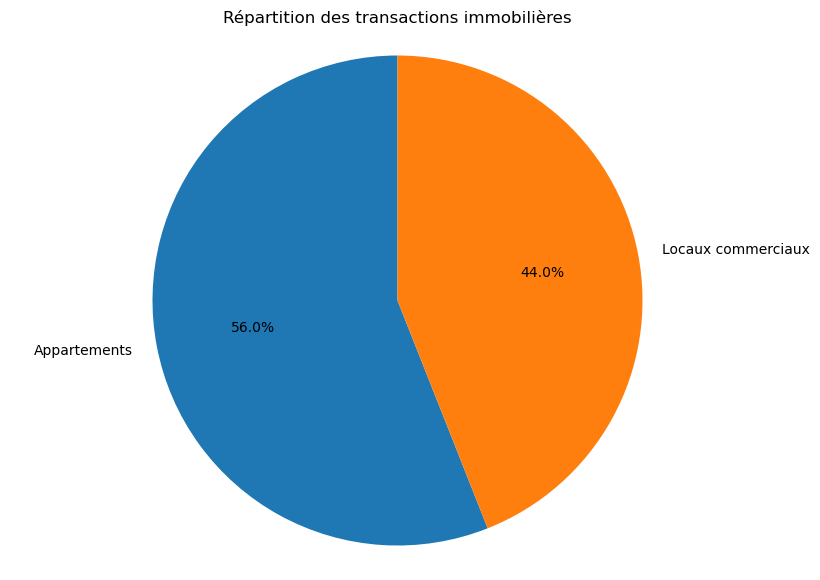

In [114]:
# Préparer les données
labels = ['Appartements', 'Locaux commerciaux']
sizes = [len(transactions_appartements2), len(transactions_locaux_commerciaux2)]

# Créer le graphique en camembert
plt.figure(figsize=(10, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Répartition des transactions immobilières')
plt.show()

Maintenant nous allons comparer la valorisation prédite pour les deux segments.

In [116]:
#Valorisation du portefeuille sur le segment des particuliers
print('la valorisation du segment particulier est (en millions deuros):')

valorisation_particuliers = df_portef[df_portef['code_type_local'] == '2']['valeur_fonciere_predite'].sum()
print(f'{valorisation_particuliers / 1_000_000:.2f}')

la valorisation du segment particulier est (en millions deuros):
82.54


In [117]:
#Valorisation du portefeuille sur le segment corporate
print('la valorisation du segment corporate est (en millions deuros):')
valorisation_corporate = df_portef[df_portef['code_type_local'] == '4']['valeur_fonciere_predite'].sum()
print(f'{valorisation_corporate / 1_000_000:.2f}')

la valorisation du segment corporate est (en millions deuros):
93.90


In [118]:
valorisation_total = df_portef['valeur_fonciere_predite'].sum()
print(f'{valorisation_total / 1_000_000:.2f}')

176.44


Mes conclusions sur le segment avec la plus grande valorisation et sur les limites de cette estimation :
- Le segment corporate présente la plus grande valorisation avec **93.90 millions d'euros**, contre **82.54 millions d'euros** pour le segment particulier. Le segment corporate représente donc une part plus importante du portefeuille immobilier.
- Un petit échantillon pourrait ne pas être représentatif de l'ensemble du marché.

# Milestone 4 - Classification des données issues du jeu de test

Dans cette partie nous allons labelliser automatiquement les biens immobiliers comme étant :
- soit des Appartements
- soit des Local industriel. commercial ou assimilé
Pour cela nous allons utiliser l'algorithme du KMeans sur le jeu de données partagé par l'entreprise.

Pour que l'algorithme fonctionne, il faut que nous préparions les données en supprimant les dimensions inutiles et en nous concentrant sur le facteur discriminant entre les appartements et les locaux commerciaux : la différence dans le prix au mètre carré tel que nous l'avons vu avant.

In [122]:
#On importe les données dans un dataframe
df_aclasse = pd.read_excel(r"C:\Users\aurel\OneDrive\Desktop\Formation BIA\Projet 8 en cours\echantillon_a_classer2.xlsx")

On applique les transformations nécessaires. Tout d'abord nous allons calculer le prix au mètre carré en divisant la valeur foncière par la surface. Ensuite nous allons retirer ces colonnes car nous avons déjà l'information qu'elles contiennent dans la dimension prix au mètre carré désormais.

Enfin toutes nos données sont de l'année 2021. Nous allons retirer cette dimension qui ne devrait pas être discriminante dans le regroupement des données.

In [124]:
# calculer le prix au mètre carré
df_aclasse['prix_m2'] = df_aclasse['valeur_fonciere']/df_aclasse['surface_reelle']
df_aclasse.head()

,valeur_fonciere,code_postal,nom_commune,surface_reelle,prix_m2
0,"868,687.08",75019,Paris 19e Arrondissement,88,"9,871.44"
1,"452,050.76",75019,Paris 19e Arrondissement,45,"10,045.57"
2,"193,088.65",75019,Paris 19e Arrondissement,21,"9,194.70"
3,"303,012.55",75019,Paris 19e Arrondissement,32,"9,469.14"
4,"149,272.20",75019,Paris 19e Arrondissement,20,"7,463.61"


In [125]:
#retirer ces colonnes car nous avons déjà l'information qu'elles contiennent dans la dimension prix au mètre carré désormais.
df_aclasse = df_aclasse.drop(columns=['valeur_fonciere', 'surface_reelle','nom_commune'])
df_aclasse.head()

,code_postal,prix_m2
0,75019,"9,871.44"
1,75019,"10,045.57"
2,75019,"9,194.70"
3,75019,"9,469.14"
4,75019,"7,463.61"


Nous observons dans les données que nous avons des valeurs différentes de prix au mètre carré pour un même arrondissement (ici le 19ème arrondissement). Il se peut fort que cela soit notre dimension à utiliser pour attribuer les prix au mètre carré les plus élévé dans un département aux locaux commerciaux, et les prix les plus bas aux appartements.

Pour effectuer cette opération, nous allons utiliser l'algorithme du Kmeans qui va rechercher 2 centroïdes à travers les données.

In [127]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Préparer les données pour le clustering
X = df_aclasse[['prix_m2']].values

# Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Appliquer l'algorithme KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
df_aclasse['code_type_local'] = kmeans.fit_predict(X_scaled)

# Identifier le cluster avec le prix moyen le plus élevé comme "Local industriel. commercial ou assimilé"
prix_moyen_par_cluster = df_aclasse.groupby('code_type_local')['prix_m2'].mean()
cluster_commercial = prix_moyen_par_cluster.idxmax()

# Attribuer les labels
df_aclasse['type_local'] = df_aclasse['code_type_local'].map(
    {cluster_commercial: 'Local industriel. commercial ou assimilé', 
     1 - cluster_commercial: 'Appartement'}
)

# Remplacer les valeurs de code_type_local par 2 et 4
df_aclasse['code_type_local'] = df_aclasse['code_type_local'].map(
    {cluster_commercial: 4, 
     1 - cluster_commercial: 2}
)

# Afficher les résultats
print(df_aclasse.groupby('type_local').agg({'prix_m2': ['mean', 'min', 'max'], 'code_postal': 'count'}))

# Afficher quelques exemples
print(df_aclasse.sample(10))


                                          prix_m2                     \
                                             mean      min       max   
type_local                                                             
Appartement                              7,408.78 7,207.22  7,666.07   
Local industriel. commercial ou assimilé 9,806.92 9,194.70 10,113.20   

                                         code_postal  
                                               count  
type_local                                            
Appartement                                       20  
Local industriel. commercial ou assimilé          20  
    code_postal   prix_m2  code_type_local  \
38        75019  9,983.59                4   
16        75019  7,415.56                2   
27        75019 10,103.16                4   
34        75019  7,294.20                2   
12        75019  7,238.42                2   
36        75019  9,715.53                4   
35        75019  7,239.98                2

C:\Users\aurel\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Le fichier spécifié est introuvable
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\aurel\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\aurel\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\aurel\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\aurel\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(e

In [128]:
# On vérifie les données de la prédiction
df_aclasse

,code_postal,prix_m2,code_type_local,type_local
0,75019,"9,871.44",4,Local industriel. commercial ou assimilé
1,75019,"10,045.57",4,Local industriel. commercial ou assimilé
2,75019,"9,194.70",4,Local industriel. commercial ou assimilé
3,75019,"9,469.14",4,Local industriel. commercial ou assimilé
4,75019,"7,463.61",2,Appartement
5,75019,"9,982.02",4,Local industriel. commercial ou assimilé
6,75019,"9,674.26",4,Local industriel. commercial ou assimilé
7,75019,"7,348.92",2,Appartement
8,75019,"9,789.05",4,Local industriel. commercial ou assimilé
9,75019,"7,616.42",2,Appartement


Nous avons obtenu notre prédiction. Nous pouvons changer les labels et remplacer les valeurs à 0 par Local industriel. commercial ou assimilé et les valeurs à +1 par Appartement. 

In [130]:
#On affiche les résultats


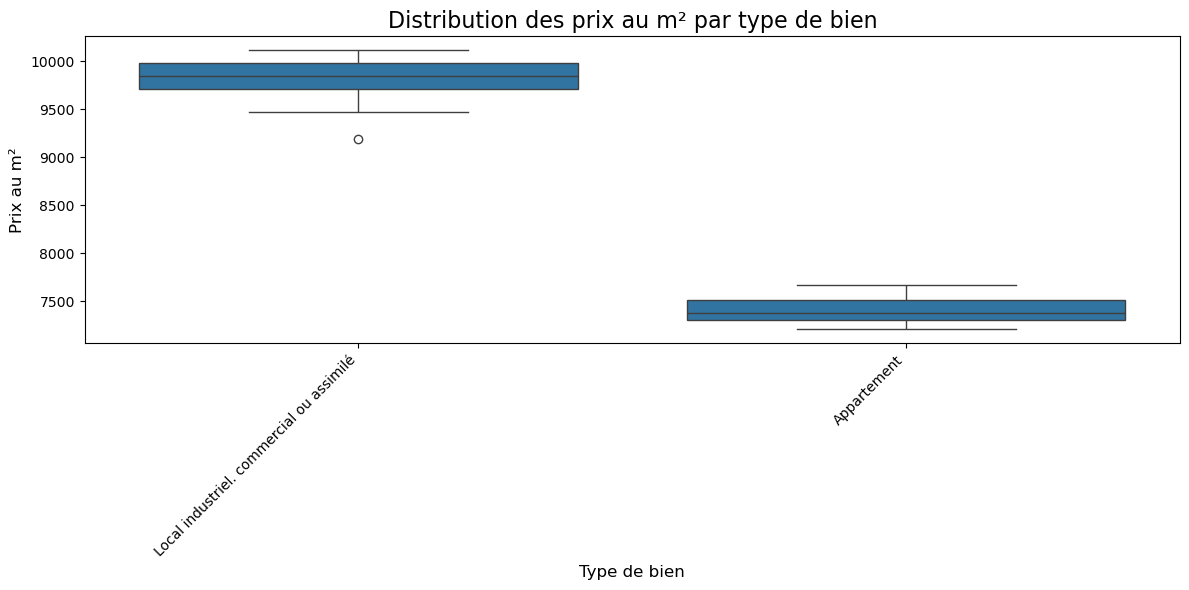

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

# Créer le boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='type_local', y='prix_m2', data=df_aclasse)

# Personnaliser le graphique
plt.title('Distribution des prix au m² par type de bien', fontsize=16)
plt.xlabel('Type de bien', fontsize=12)
plt.ylabel('Prix au m²', fontsize=12)

# Rotation des labels de l'axe x pour une meilleure lisibilité
plt.xticks(rotation=45, ha='right')

# Ajuster la mise en page
plt.tight_layout()

# Afficher le graphique
plt.show()



# Milestone 5 - Analyse et présentation des résultats

Mes conclusions sur l'analyse et les limites de l'exercice :
- L'algorithme KMeans a permis de classer les biens en deux catégories principales : Appartements (code_type_local = 2) et Locaux industriels, commerciaux ou assimilés (code_type_local = 4).
- Les résultats montrent que les biens avec des prix au m² élevés ont été correctement attribués à la catégorie des locaux commerciaux, tandis que les biens avec des prix au m² plus bas ont été classés comme appartements.
- prix moyen appartements : 7404.78 euros
- Prix moyen locaux commerciaux : 9806.92 euros 
- certains biens avec un prix au m² élevé pourraient être des appartements luxueux plutôt que des locaux commerciaux.
- KMeans suppose que les clusters sont convexes et bien séparés, ce qui peut ne pas être le cas dans des données réelles où il existe un chevauchement entre les catégories.
- En conclusion, bien que cet exercice fournisse une approche intéressante pour différencier appartements et locaux commerciaux à partir du prix au mètre carré, il reste simplifié et pourrait être enrichi par une analyse plus approfondie et multidimensionnelle.